## Reshaping Data

In [1]:
import pandas as pd
df_wide = {"subject" : ["BHO","GWB","WJC"],
      "before" : [160,120, 105],
      "after" : [115, 135, 145]}

BP_wide = pd.DataFrame(df_wide)
BP_wide

,subject,before,after
0,BHO,160,115
1,GWB,120,135
2,WJC,105,145


In [2]:
df_narrow = {"subject" : ["BHO","GWB","WJC","BHO","GWB","WJC"],
             "when" : ["before","before","before","after","after","after"],
             "sbp" : [160,120,105,115,135,145]}

BP_narrow = pd.DataFrame(df_narrow)
BP_narrow


,subject,when,sbp
0,BHO,before,160
1,GWB,before,120
2,WJC,before,105
3,BHO,after,115
4,GWB,after,135
5,WJC,after,145


1. `pivot()`: Long to Wide Format

On the other hand, `pivot()` is used to reshape data from a long format back into a wide format. It allows you to create new columns from unique values in a specified column, distributing the data over those new columns.

```
pandas.pivot(data, index=None, columns=None, values=None)
```

- `data`: The DataFrame you want to reshape (in long format).

- `index`: The column whose unique values will form the row labels (index).

- `columns`: The column whose unique values will become the new columns in the reshaped DataFrame.

- `values`: The column that contains the values you want to spread across the new columns (the data to fill the reshaped DataFrame).

In [3]:
#Not really what you want.
pd.pivot(BP_narrow, columns= "when", values="sbp")

when,after,before
0,NaN,160.0
1,NaN,120.0
2,NaN,105.0
3,115.0,NaN
4,135.0,NaN
5,145.0,NaN


In [4]:
#pivoting wider: Narrow to wide
#This is what you want!
pd.pivot(BP_narrow, index = "subject", columns= "when", values="sbp")

when,after,before
subject,,
BHO,115,160
GWB,135,120
WJC,145,105


2. `melt()`: Wide to Long Format

`melt()` is used to "unpivot" a dataset from a wide format to a long format. It takes columns that are usually spread across multiple fields and condenses them into two columns: one for variable names and one for their values. This is especially useful when you want to aggregate or group data based on specific variable values.

```
pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)
```

- `frame`: The DataFrame that you want to reshape.

- `id_vars`: Columns that should remain the same (identifiers). These columns won't be melted.

- `value_vars`: The columns you want to melt (those that will be "unpivoted" into a long format). If not provided, all columns except the id_vars will be melted by default.

- `var_name`: The name of the new column that will hold the old column names. If not specified, this column will be named variable by default.

- `value_name`: The name of the new column that will hold the values from the melted columns. If not specified, this column will be named value by default.



In [5]:
#Use melt to go wide to narrow
#pd.melt(df, id_vars=, value_vars=, var_name=, value_name=, ignore_index=)
pd.melt(BP_wide, id_vars = "subject",value_vars = ["before","after"], value_name = "bp", var_name = "when")

,subject,when,bp
0,BHO,before,160
1,GWB,before,120
2,WJC,before,105
3,BHO,after,115
4,GWB,after,135
5,WJC,after,145


In class exercises:

- Find the most gender neutral name
- What name saw the biggest drop from 1900 to 1950? How about from 1950 to 2000?

In [11]:
import pandas as pd 

babynames = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/babynames.csv")
babynames.head()

babynames.shape

(1924665, 5)

In [12]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [13]:
peng_long = pd.melt(penguins, id_vars = ["sex", "species", "island"],  value_name = "value", var_name = "measurement")

peng_long.head()

,sex,species,island,measurement,value
0,Male,Adelie,Torgersen,bill_length_mm,39.1
1,Female,Adelie,Torgersen,bill_length_mm,39.5
2,Female,Adelie,Torgersen,bill_length_mm,40.3
3,NaN,Adelie,Torgersen,bill_length_mm,NaN
4,Female,Adelie,Torgersen,bill_length_mm,36.7


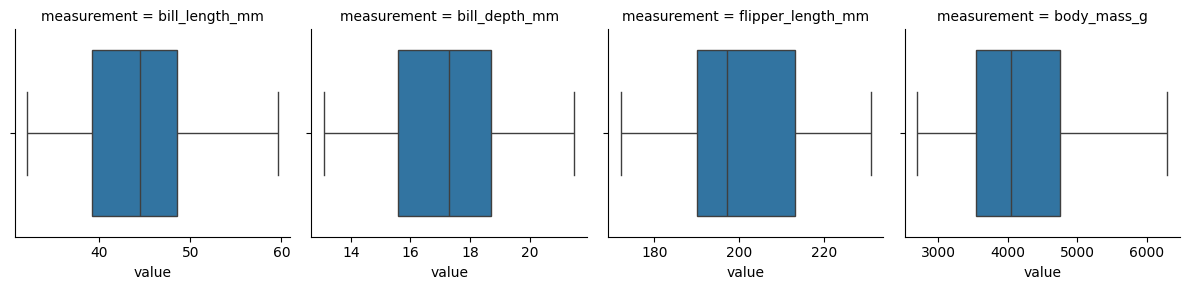

In [18]:
## visualize boxplots of each species and facet by each measure
import seaborn as sns

g = sns.FacetGrid(peng_long, col= "measurement",  sharey= False, sharex = False)
g.map_dataframe(sns.boxplot, x="value")